# Convolutional neural network tested on the mnist data


https://martin-thoma.com/tensor-flow-quick/

In [12]:
%matplotlib inline

import tensorflow as tf
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

In [13]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


#### Dataset Mnist

In [14]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [15]:
mnist.train.labels.shape

(55000, 10)

In [16]:
mnist.train.images.shape

(55000, 784)

In [17]:
mnist.train.num_examples

55000

## Define the model

In [18]:
learning_rate = 0.001
training_iters = 50000
batch_size = 128
display_step = 20

In [19]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

In [20]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [21]:
# Create model
def conv2d(img, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(img, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b))

def max_pool(img, k):
    return tf.nn.max_pool(img, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def conv_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(_X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = max_pool(conv1, k=2)
    # Apply Dropout
    conv1 = tf.nn.dropout(conv1, _dropout)

    # Convolution Layer
    conv2 = conv2d(conv1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = max_pool(conv2, k=2)
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, _dropout)

    # Fully connected layer
    # Reshape conv2 output to fit dense layer input
    dense1 = tf.reshape(conv2, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.add(tf.matmul(dense1, _weights['wd1']), _biases['bd1']))
    # Apply Dropout
    dense1 = tf.nn.dropout(dense1, _dropout) # Apply Dropout

    # Output, class prediction
    out = tf.add(tf.matmul(dense1, _weights['out']), _biases['out'])
    return out

In [22]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])), 
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])), 
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), 
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes])) 
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [23]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

In [24]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [25]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [26]:
# Initializing the variables
init = tf.initialize_all_variables()

In [27]:
sess = tf.Session() 

In [28]:
sess.run(init)
    
step = 1

# Keep training until reach max iterations
while step * batch_size < training_iters:
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    # Fit training using batch data
    sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
    if step % display_step == 0:
        
        # Calculate batch accuracy
        acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
        
        # Calculate batch loss
        loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
        print ("Iter " , str(step*batch_size) , ", Minibatch Loss= " , 
              "{:.6f}".format(loss) , ", Training Accuracy= " , "{:.5f}".format(acc))
    
    step += 1
    
print ("Optimization Finished!")

print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, 
                                                             y: mnist.test.labels, 
                                                             keep_prob: 1.}))



Iter  2560 , Minibatch Loss=  17690.552734 , Training Accuracy=  0.39062
Iter  5120 , Minibatch Loss=  4937.826172 , Training Accuracy=  0.67188
Iter  7680 , Minibatch Loss=  7927.498535 , Training Accuracy=  0.64062
Iter  10240 , Minibatch Loss=  3381.399414 , Training Accuracy=  0.79688
Iter  12800 , Minibatch Loss=  3286.366211 , Training Accuracy=  0.73438
Iter  15360 , Minibatch Loss=  1553.228271 , Training Accuracy=  0.83594
Iter  17920 , Minibatch Loss=  1552.348389 , Training Accuracy=  0.84375
Iter  20480 , Minibatch Loss=  682.970581 , Training Accuracy=  0.89844
Iter  23040 , Minibatch Loss=  865.108276 , Training Accuracy=  0.91406
Iter  25600 , Minibatch Loss=  1643.545898 , Training Accuracy=  0.82812
Iter  28160 , Minibatch Loss=  1084.554077 , Training Accuracy=  0.87500
Iter  30720 , Minibatch Loss=  1262.510254 , Training Accuracy=  0.85938
Iter  33280 , Minibatch Loss=  1287.079468 , Training Accuracy=  0.88281
Iter  35840 , Minibatch Loss=  702.798706 , Training Ac

### Make a prediction

Once our model has been trained, how can we use it in order to predict the class for a new image?

In [29]:
# select the k'th image from the data
k = 10

In [30]:
image = mnist.train.images[k:k+1]
true_label = mnist.train.labels[k:k+1].argmax()

print("The correct class of the image is", true_label)

The correct class of the image is 0


In [31]:
type(pred)

tensorflow.python.framework.ops.Tensor

In [32]:
pred.get_shape()

TensorShape([Dimension(None), Dimension(10)])

In [33]:
predicted_output = sess.run(pred, feed_dict={x: image,  keep_prob: 1.})

In [35]:
predicted_output

array([[ 59590.05859375, -20658.38476562,   3637.93725586,  -3696.74951172,
        -12881.61132812,  12165.77246094,   5905.64697266,   -197.47770691,
         14486.82226562,   9931.234375  ]], dtype=float32)

In [36]:
predicted_label = np.argmax(predicted_output)
print("The correct class of the image is", true_label)
print("The predicted class of the image is", predicted_label)

The correct class of the image is 0
The predicted class of the image is 0


#### Checking the  image

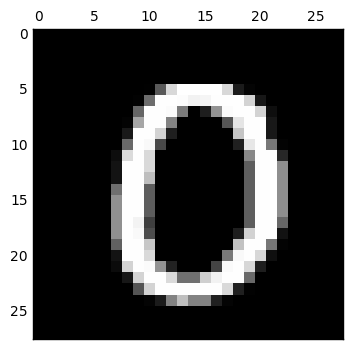

In [37]:
# We reshape the image as an squared matrix and print it
plt.matshow(image.reshape(28,28) , cmap='gray')

### Make several predictions

In [38]:
images = mnist.train.images[0:15]

In [39]:
images.shape

(15, 784)

In [40]:
len(images)

15

In [41]:
predictions  = sess.run(pred, feed_dict={x: images ,  keep_prob: 1.})

In [42]:
predicted_labels = np.argmax(predictions, axis=1)

In [43]:
def plot_images(X, predictions):
    num_elements = len(X)
    plt.figure(figsize=(num_elements*2.5,num_elements))
    
    for i, x in enumerate(X):
        plt.subplot(1,num_elements, i+1)
        plt.imshow(x.reshape(28,28), cmap=plt.get_cmap('gray'))
        plt.xlabel("predicted_class " + str(predictions[i]), rotation='horizontal')
        
        plt.xticks(())
        plt.yticks(())

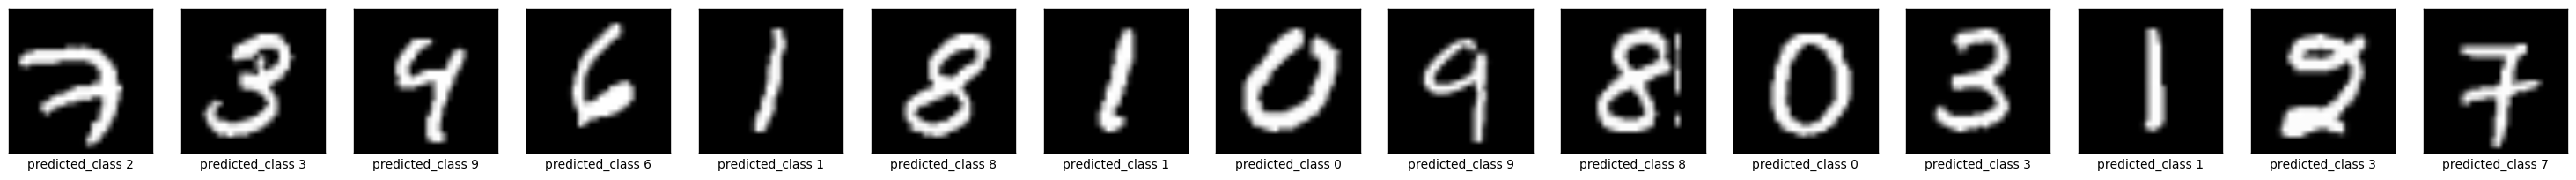

In [44]:
plot_images(images, predicted_labels)

### TODO: Visualize network weights

In [225]:
weights['wc1']